# Методы обучения без учителя.

### 1. Выберем датасет

In [ ]:
!wget https://archive.ics.uci.edu/static/public/850/raisin.zip

--2024-05-02 09:55:10--  https://archive.ics.uci.edu/static/public/850/raisin.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘raisin.zip’

raisin.zip              [ <=>                ] 111.99K  --.-KB/s    in 0.08s   

2024-05-02 09:55:10 (1.36 MB/s) - ‘raisin.zip’ saved [114677]



In [ ]:
!unzip raisin.zip
!unzip Raisin_Dataset.zip

Archive:  raisin.zip
  inflating: Raisin_Dataset.zip      
Archive:  Raisin_Dataset.zip
   creating: Raisin_Dataset/
  inflating: Raisin_Dataset/Raisin_Dataset.arff  
  inflating: Raisin_Dataset/Raisin_Dataset.txt  
  inflating: Raisin_Dataset/Raisin_Dataset.xlsx  


In [ ]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.cluster import MeanShift,AgglomerativeClustering,KMeans

In [ ]:
raw_data = loadarff('Raisin_Dataset/Raisin_Dataset.arff')
df = pd.DataFrame(raw_data[0])

In [ ]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,0
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,0
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,0
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,0
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,0


In [ ]:
df["Class"] = pd.factorize(df["Class"])[0]
prim_class = df['Class']
D1 = df.drop("Class",axis=1)

### С использованием метода главных компонент проведем для датасета D1 снижение размерности данных до двух.

Метод уменьшения размерности данных - pca. Делаем новые оси и проецирует на них все значения.

In [ ]:
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)

### С использованием алгоритма t-SNE также проведем для датасета D1 снижение размерности данных до двух.

Метод для визуализации - tsne.

In [ ]:
tsne = TSNE(n_components=2)
D3 = tsne.fit_transform(D1)

### Визуализируем точки датасетов D2 и D3.

<Axes: >

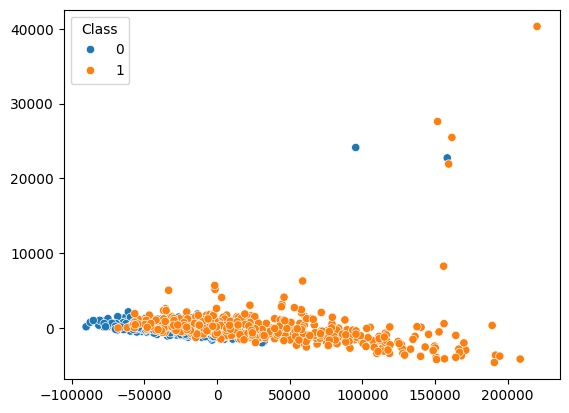

In [ ]:
sns.scatterplot(x=D2[::,0],y=D2[::,1],hue=prim_class)

<Axes: >

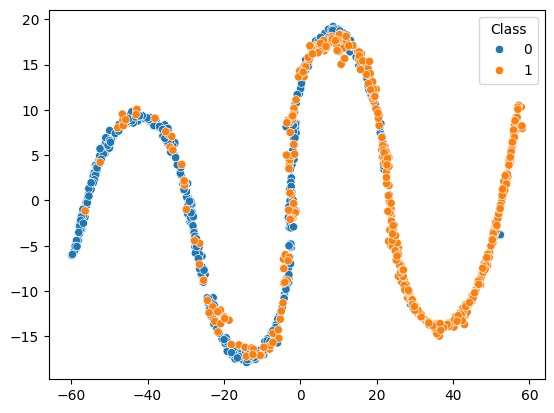

In [ ]:
sns.scatterplot(x=D3[::,0],y=D3[::,1],hue=prim_class)

### Проведем кластеризацию для всех датасетов и оценим качество.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
aglm = AgglomerativeClustering(n_clusters=2)
mean_shift = MeanShift()

In [ ]:
dfs = [D1,D2,D3]
models = [kmeans,aglm,mean_shift]

In [ ]:
df_res = pd.DataFrame(columns = ["Model Name","D1 Score","D2 Score","D3 Score"])
for i in range(len(models)):
    temp_row = []
    temp_row.append(type(models[i]).__name__)
    temp_row.append(adjusted_mutual_info_score(prim_class,models[i].fit_predict(D1)))
    temp_row.append(adjusted_mutual_info_score(prim_class,models[i].fit_predict(D2)))
    temp_row.append(adjusted_mutual_info_score(prim_class,models[i].fit_predict(D3)))
    df_res.loc[i] = temp_row

In [ ]:
df_res

,Model Name,D1 Score,D2 Score,D3 Score
0,KMeans,0.257459,0.260436,0.326578
1,AgglomerativeClustering,0.251534,0.251534,0.259902
2,MeanShift,0.095676,0.095676,0.294972
